<a href="https://colab.research.google.com/github/deliabel/CodeDivisionWorksheets/blob/main/Air_Quality_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### All boxes in italics are the instuctions from the worksheet. Other text boxes are my write-up and notes.


# *Clean and wrangle air quality data*

*The following data file contains data collected at a roadside monitoring station.  You can see the data in a spreadsheet here: https://docs.google.com/spreadsheets/d/1XpAvrpuyMsKDO76EZ3kxuddBOu7cZX1Od4uEts14zco/edit?usp=sharing*

*The data contains:*
* *a heading line (Chatham Roadside) which needs to be skipped*   
* *dates which are sometimes left- and sometimes right-justified indicating that they are not formatted as dates, rather they are text (so need to be converted to dates)*   
* *times which are not all in the same format*   
* *Nitrogen Dioxide levels which are, again, text and sometimes contain nodata*   
* *Status which is always the same*   






### *Project - clean, sort and wrangle the data*

* *Read the dataset into a dataframe, skipping the first row*   
* *Convert dates to date format*   
* *Remove rows with nodata in the Nitrogen dioxide column*   
* *Convert the Nitrogen dioxide levels values to float type*   
* *Sort by Nitrogen dioxide level*   
* *Create a new column for 'Weekdays' (use df['Date'].dt.weekday)*   
* *Rename the column Nitrogen dioxide level to NO2 Level (V ug/m2)*   
* *Remove the Status column*   

*The dataset can be viewed here:  https://drive.google.com/file/d/1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ/view?usp=sharing  and the data accessed here: https://drive.google.com/uc?id=1SOe9b4VJ1FCtDVgZ2T8d00-jTw2Kux1i  This is a .csv file*


## Cleaning the data

Using the guidence provided as a starting point, the data was made more useable by:
* Skipping the first row in the raw dataset as it was read in, to remove a title row.
* Converting the 'Dates' column values from object type to a datetime type, so that datetime functions can be used.
* Replacing the midnight values in the 'Time' column to match the format of the other values and to use the standard 00:00 instead of 24:00.
** Code commented out, but left in place, incase a problem was found later: Removing the rows without a measurment (value is 'nodata') from the 'Nitrogen Dioxide' column.
* Converting the 'nodata' values in the 'Nitrogen Dioxide' column to none, to allow the column data type to be changed with these rows in place.
* Converting the 'Nitrogen Dioxide' column values from object type to a float type, in order to acces the numbers.
* Renaming the 'Nitrogen Dioxide' column to 'NO2 levels (V µg/m3)' to better describe the measurements and to allow the 'Status' column to be removed.
* Removing the unnecessary 'Status' column.
* Adding a 'Weekday' column to label the rows by day of the week, to allow analysis and plots.
* Adding 'Week' column to label the rows by week.



In [376]:
import pandas as pd

In [377]:
# Reads the dataset into a dataframe, skipping the first row
# Output gives an idea of the dataset
url2020 = 'https://raw.githubusercontent.com/deliabel/CodeDivisionWorksheets/main/data%20sets/NO2-measured-data-2020-2021-Chatham-Roadside.csv'
measured_20df = pd.read_csv(url2020, skiprows = 1)
measured_20df

,Date,Time,Nitrogen dioxide,Status
0,01/01/2020,1:00,41.07113,V µg/m³
1,01/01/2020,2:00,38.9604,V µg/m³
2,01/01/2020,3:00,35.12313,V µg/m³
3,01/01/2020,4:00,35.85312,V µg/m³
4,01/01/2020,5:00,32.10503,V µg/m³
...,...,...,...,...
8779,31/12/2020,20:00,24.4694,V µg/m³
8780,31/12/2020,21:00,22.62313,V µg/m³
8781,31/12/2020,22:00,20.3186,V µg/m³
8782,31/12/2020,23:00,21.47177,V µg/m³


In [378]:
# (checks if any columns have null data, and finds out which type of data is in each column)
measured_20df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              8784 non-null   object
 1   Time              8784 non-null   object
 2   Nitrogen dioxide  8784 non-null   object
 3   Status            8784 non-null   object
dtypes: object(4)
memory usage: 274.6+ KB


In [379]:
# Converts values in 'Date' column to date format
# Output shows the 'Date' datatype has changed to datetime64
measured_20df['Date']= pd.to_datetime(measured_20df['Date'], dayfirst = True)
measured_20df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8784 non-null   datetime64[ns]
 1   Time              8784 non-null   object        
 2   Nitrogen dioxide  8784 non-null   object        
 3   Status            8784 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 274.6+ KB


In [380]:
# additional: Replaces midnight time, making the format match the rest
# output shows the last midnight time is now 00:00
measured_20df = measured_20df.replace('24:00:00', '00:00')
measured_20df

,Date,Time,Nitrogen dioxide,Status
0,2020-01-01,1:00,41.07113,V µg/m³
1,2020-01-01,2:00,38.9604,V µg/m³
2,2020-01-01,3:00,35.12313,V µg/m³
3,2020-01-01,4:00,35.85312,V µg/m³
4,2020-01-01,5:00,32.10503,V µg/m³
...,...,...,...,...
8779,2020-12-31,20:00,24.4694,V µg/m³
8780,2020-12-31,21:00,22.62313,V µg/m³
8781,2020-12-31,22:00,20.3186,V µg/m³
8782,2020-12-31,23:00,21.47177,V µg/m³


In [381]:
# Removes rows with nodata in the 'Nitrogen dioxide' column
# Output shows that the indices have not changed, but there are now fewer rows
#measured_20df = measured_20df.loc[measured_20df['Nitrogen dioxide'] != 'nodata']
#measured_20df

In [382]:
# (checks there are no nodata rows left) <--- remove later?
# (as a second check, if this is run first, there are 152 rows: 8784 - 152 = 8632, which is the new length of the df)
#measured_20df_check = measured_20df[measured_20df['Nitrogen dioxide'] == 'nodata']
#measured_20df_check

In [383]:
# additional: Replaces 'nodata' with None, might help with plots, will introduce nulls
# Output shows there are now null values in the 'Nitrogen dioxide' column, and a section where 'nodata' has been replaced with None
measured_20df = measured_20df.replace('nodata', None)
print(measured_20df.info())
measured_20df.iloc[50:60]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8784 non-null   datetime64[ns]
 1   Time              8784 non-null   object        
 2   Nitrogen dioxide  8632 non-null   object        
 3   Status            8784 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 274.6+ KB
None


,Date,Time,Nitrogen dioxide,Status
50,2020-01-03,3:00,6.26936,V µg/m³
51,2020-01-03,4:00,5.44992,V µg/m³
52,2020-01-03,5:00,4.61126,V µg/m³
53,2020-01-03,6:00,7.82237,V µg/m³
54,2020-01-03,7:00,15.06604,V µg/m³
55,2020-01-03,8:00,24.25691,V µg/m³
56,2020-01-03,9:00,24.04692,V µg/m³
57,2020-01-03,10:00,27.66,V µg/m³
58,2020-01-03,11:00,None,V µg/m³
59,2020-01-03,12:00,25.05419,V µg/m³


In [384]:
# Converts the 'Nitrogen dioxide' values to float type
# Output shows 'Nitrogen dioxide' datatype has changed to float64
measured_20df = measured_20df.astype({'Nitrogen dioxide': float,})
measured_20df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8784 non-null   datetime64[ns]
 1   Time              8784 non-null   object        
 2   Nitrogen dioxide  8632 non-null   float64       
 3   Status            8784 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 274.6+ KB


In [385]:
# Renames the column 'Nitrogen dioxide' to 'NO2 Level (V ug/m3)'
measured_20df = measured_20df.rename({'Nitrogen dioxide': "NO2 Level (V ug/m3)"}, axis="columns")
measured_20df.head(3)

,Date,Time,NO2 Level (V ug/m3),Status
0,2020-01-01,1:00,41.07113,V µg/m³
1,2020-01-01,2:00,38.96040,V µg/m³
2,2020-01-01,3:00,35.12313,V µg/m³


In [386]:
# Removes the 'Status' column
measured_20df = measured_20df.drop('Status', axis = 1)
measured_20df

,Date,Time,NO2 Level (V ug/m3)
0,2020-01-01,1:00,41.07113
1,2020-01-01,2:00,38.96040
2,2020-01-01,3:00,35.12313
3,2020-01-01,4:00,35.85312
4,2020-01-01,5:00,32.10503
...,...,...,...
8779,2020-12-31,20:00,24.46940
8780,2020-12-31,21:00,22.62313
8781,2020-12-31,22:00,20.31860
8782,2020-12-31,23:00,21.47177


In [387]:
# Creates a new 'Weekday' column to label days of the week
measured_20df.insert(1, 'Weekday', measured_20df['Date'].dt.weekday)
measured_20df.head(3)

,Date,Weekday,Time,NO2 Level (V ug/m3)
0,2020-01-01,2,1:00,41.07113
1,2020-01-01,2,2:00,38.96040
2,2020-01-01,2,3:00,35.12313


In [388]:
# (checks that there are labels for 7 days, and that all the days are included: Monday is 0 and Sunday is 6)
measured_20df['Weekday'].unique()

array([2, 3, 4, 5, 6, 0, 1])

In [389]:
# additional: Creates a new 'Week' column to label weeks in the year
# Output shows the new column is present and that there are labels for each week in the year
measured_20df.insert(2, 'Week', measured_20df['Date'].dt.isocalendar().week)
print(measured_20df.head(3))
measured_20df['Week'].unique()

        Date  Weekday  Week  Time  NO2 Level (V ug/m3)
0 2020-01-01        2     1  1:00             41.07113
1 2020-01-01        2     1  2:00             38.96040
2 2020-01-01        2     1  3:00             35.12313


<IntegerArray>
[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Length: 53, dtype: UInt32

### *Expand the dataset*
---

*There is a second data set here covering the year 2021:  https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ*

*Concatenate the two datasets to expand it to 2020 and 2021.*  

*Before you can concatenate the datasets you will need to clean and wrangle the second dataset in the same way as the first.  Use the code cell below.  Give the second dataset a different name.*

### *Show summary statistics for larger dataset*
---

*After the datasets have been concatenated, group the data by Weekdays and show summary statistics by day of the week.*

## Cleaning the second dataset

The second dataset was cleaned in the same way.

In [390]:
# Reads the dataset into a dataframe, skipping the first row
url2021 = 'https://raw.githubusercontent.com/deliabel/CodeDivisionWorksheets/main/data%20sets/NO2-measured-data-2021-2022-Chatham-Roadside.csv'
measured_21df = pd.read_csv(url2021, skiprows = 1)
measured_21df

,Date,Time,Nitrogen dioxide,Status
0,01/01/2021,01:00,16.58269,V µg/m³
1,01/01/2021,02:00,14.00478,V µg/m³
2,01/01/2021,03:00,15.35208,V µg/m³
3,01/01/2021,04:00,13.49688,V µg/m³
4,01/01/2021,05:00,12.47511,V µg/m³
...,...,...,...,...
8755,31/12/2021,20:00,12.51492,P µg/m³
8756,31/12/2021,21:00,14.00046,P µg/m³
8757,31/12/2021,22:00,10.04780,P µg/m³
8758,31/12/2021,23:00,3.49557,P µg/m³


In [391]:
# (checks if any columns have null data, and finds out which type of data is in each column)
measured_21df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              8760 non-null   object
 1   Time              8760 non-null   object
 2   Nitrogen dioxide  8760 non-null   object
 3   Status            8760 non-null   object
dtypes: object(4)
memory usage: 273.9+ KB


In [392]:
# Converts values in 'Date' column to date format
measured_21df['Date']= pd.to_datetime(measured_21df['Date'], dayfirst = True)
measured_21df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8760 non-null   datetime64[ns]
 1   Time              8760 non-null   object        
 2   Nitrogen dioxide  8760 non-null   object        
 3   Status            8760 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 273.9+ KB


In [393]:
# additional: Replaces midnight time, making the format match the rest
measured_21df = measured_21df.replace('24:00', '00:00')
measured_21df.tail(26)

,Date,Time,Nitrogen dioxide,Status
8734,2021-12-30,23:00,4.47334,P µg/m³
8735,2021-12-30,00:00,1.35644,P µg/m³
8736,2021-12-31,01:00,1.23356,P µg/m³
8737,2021-12-31,02:00,0.03299,P µg/m³
8738,2021-12-31,03:00,0.20081,P µg/m³
8739,2021-12-31,04:00,0.08654,P µg/m³
8740,2021-12-31,05:00,0.81281,P µg/m³
8741,2021-12-31,06:00,2.15443,P µg/m³
8742,2021-12-31,07:00,2.41979,P µg/m³
8743,2021-12-31,08:00,5.44393,P µg/m³


In [394]:
# Removes rows with nodata in the 'Nitrogen dioxide' column
# measured_21df = measured_21df.loc[measured_21df['Nitrogen dioxide'] != 'nodata']
#measured_21df = measured_21df[measured_21df['Nitrogen dioxide'] != 'nodata']
#measured_21df

In [395]:
# (checks there are no nodata rows left) <--- remove later?
#measured_21df_check = measured_21df[measured_21df['Nitrogen dioxide'] == 'nodata']
#measured_21df_check

In [396]:
# additional: replaces 'nodata' with None, might help with plots, will introduce nulls
measured_21df = measured_21df.replace('nodata', None)
measured_21df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8760 non-null   datetime64[ns]
 1   Time              8760 non-null   object        
 2   Nitrogen dioxide  8680 non-null   object        
 3   Status            8760 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 273.9+ KB


In [397]:
# Converts the 'Nitrogen dioxide' values to float type
measured_21df = measured_21df.astype({'Nitrogen dioxide': float,})
measured_21df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8760 non-null   datetime64[ns]
 1   Time              8760 non-null   object        
 2   Nitrogen dioxide  8680 non-null   float64       
 3   Status            8760 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 273.9+ KB


In [398]:
# Renames the column 'Nitrogen dioxide' to 'NO2 Level (V ug/m3)'
measured_21df = measured_21df.rename({'Nitrogen dioxide': "NO2 Level (V ug/m3)"}, axis="columns")
measured_21df.head(3)

,Date,Time,NO2 Level (V ug/m3),Status
0,2021-01-01,01:00,16.58269,V µg/m³
1,2021-01-01,02:00,14.00478,V µg/m³
2,2021-01-01,03:00,15.35208,V µg/m³


In [399]:
# Removes the 'Status' column
measured_21df = measured_21df.drop('Status', axis = 1)
measured_21df

,Date,Time,NO2 Level (V ug/m3)
0,2021-01-01,01:00,16.58269
1,2021-01-01,02:00,14.00478
2,2021-01-01,03:00,15.35208
3,2021-01-01,04:00,13.49688
4,2021-01-01,05:00,12.47511
...,...,...,...
8755,2021-12-31,20:00,12.51492
8756,2021-12-31,21:00,14.00046
8757,2021-12-31,22:00,10.04780
8758,2021-12-31,23:00,3.49557


In [400]:
# Creates a new 'Weekday' column to label days of the week
measured_21df.insert(1, 'Weekday', measured_21df['Date'].dt.weekday)
measured_21df.head(3)

,Date,Weekday,Time,NO2 Level (V ug/m3)
0,2021-01-01,4,01:00,16.58269
1,2021-01-01,4,02:00,14.00478
2,2021-01-01,4,03:00,15.35208


In [401]:
# (checks that there are labels for 7 days, and that all the days are included: monday is 0 and sunday is 6)
measured_21df['Weekday'].unique()

array([4, 5, 6, 0, 1, 2, 3])

In [402]:
# additional: Creates a new 'Week' column to label weeks in the year
measured_21df.insert(2, 'Week', measured_21df['Date'].dt.isocalendar().week)
print(measured_21df.head(3))
measured_21df['Week'].unique()

        Date  Weekday  Week   Time  NO2 Level (V ug/m3)
0 2021-01-01        4    53  01:00             16.58269
1 2021-01-01        4    53  02:00             14.00478
2 2021-01-01        4    53  03:00             15.35208


<IntegerArray>
[53,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
Length: 53, dtype: UInt32

#### ---end of cleaning---
---


## Concatonating datasets

In [403]:
# Concatenates the two datasets to expand it to 2020 and 2021.
# Output shows the new length of the dataframe
measuredNO2_df = pd.concat([measured_20df, measured_21df], ignore_index = True)
print('shape:', measuredNO2_df.shape)
measuredNO2_df

shape: (17544, 5)


,Date,Weekday,Week,Time,NO2 Level (V ug/m3)
0,2020-01-01,2,1,1:00,41.07113
1,2020-01-01,2,1,2:00,38.96040
2,2020-01-01,2,1,3:00,35.12313
3,2020-01-01,2,1,4:00,35.85312
4,2020-01-01,2,1,5:00,32.10503
...,...,...,...,...,...
17539,2021-12-31,4,52,20:00,12.51492
17540,2021-12-31,4,52,21:00,14.00046
17541,2021-12-31,4,52,22:00,10.04780
17542,2021-12-31,4,52,23:00,3.49557


In [404]:
# Displays a summary of statistics for the measured nitrogen dioxide levels
measuredNO2_df[["NO2 Level (V ug/m3)"]].describe()

,NO2 Level (V ug/m3)
count,17312.000000
mean,18.590636
std,12.793750
min,-0.777430
25%,9.020180
50%,15.433880
75%,24.919745
max,113.061890


## Looking at the Data
To get an idea of any trends in the data or questions that could be investigated, ... different ways of viewing the data.

Range of Measurements
* Found the maximum and minimum measurements of the nitrogen dioxide level for each year.
* Allows the range of the measured concentrations to be seen.


Annual plots
* For each year: Seperated the data by finding the mean measurment for each week, and then plotted both years on one graph.
* Gives a rough idea of any trends over a year, and allows years to be compared.
* Note: The week numbers mean that the dates in this plot will not exactly be aligned. This should be a small factor considering that weekday may have more effect than date, and the season will still match.

Weekly plots
* Grouped the data for both years by day of the week, calculated maximums and means for each days, and made a bar chart.
* This should allow any trends over a week to be seen.

### Range of the measurements

In [405]:
# shows minimum and maximum nitrogen dioxide levels for the year 2020
# measured_20df[["NO2 Level (V ug/m3)"]].describe()
minNO2_20 = measured_20df['NO2 Level (V ug/m3)'].min()
maxNO2_20 = measured_20df['NO2 Level (V ug/m3)'].max()
print('2020 \nminimum measurement:', minNO2_20, '\nmaximum measurement:', maxNO2_20)

2020 
minimum measurement: 0.4241 
maximum measurement: 113.06189


In [406]:
# shows minimum and maximum nitrogen dioxide levels for the year 2020
# measured_21df[["NO2 Level (V ug/m3)"]].describe()
minNO2_21 = measured_21df['NO2 Level (V ug/m3)'].min()
maxNO2_21 = measured_21df['NO2 Level (V ug/m3)'].max()
print('2021 \nminimum measurement:', minNO2_21, '\nmaximum measurement:', maxNO2_21)

2021 
minimum measurement: -0.77743 
maximum measurement: 82.59609


In [407]:
# Sorts 2021 dataframe by Nitrogen dioxide level
# Output shows there are only 9 negative values.
sorted_21df = measured_21df.sort_values('NO2 Level (V ug/m3)')
sorted_21df.head(10)

,Date,Weekday,Week,Time,NO2 Level (V ug/m3)
7177,2021-10-27,2,43,02:00,-0.77743
7009,2021-10-20,2,42,02:00,-0.54076
7107,2021-10-24,6,42,04:00,-0.41740
6674,2021-10-06,2,40,03:00,-0.31174
7178,2021-10-27,2,43,03:00,-0.28544
7010,2021-10-20,2,42,03:00,-0.26249
8715,2021-12-30,3,52,04:00,-0.13101
8015,2021-11-30,1,48,00:00,-0.10519
7106,2021-10-24,6,42,03:00,-0.09610
8737,2021-12-31,4,52,02:00,0.03299



####Negative Values
The negative values are not meaningful measurements. This indicates that there is something wrong, maybe a callibration error or a problem with the sensors. It is unclear if this problem effects the rest of the data.

There are only 9 negative values, so they should not have a large effect on the calculations. If a problem was noticed, they could be removed in a similar way to the part of the cleaning section where 'nodata' was replaces with None.

In [408]:
# Regulations (section)
# shows means of both years

# together with the maximums from the range section, this shows that niether year exceeded the regulations:
# mean annual concentation not more than 40 ug/m3
# hourly mean not exceed 250 more than 18 ug/m3 times
# air quality standards regulation 2010

#measured_20df[["NO2 Level (V ug/m3)"]].describe()
#measured_21df[["NO2 Level (V ug/m3)"]].describe()
meanNO2_20 = measured_20df['NO2 Level (V ug/m3)'].mean()
meanNO2_21 = measured_21df['NO2 Level (V ug/m3)'].mean()
print('2020 \nmean measurement:', meanNO2_20, '\n2021 \nmean measurement:', meanNO2_21)

2020 
mean measurement: 18.543642840593144 
2021 
mean measurement: 18.637368785714287


### Annual Plots

In [409]:
import matplotlib.pyplot as plt

In [410]:
# Finds mean nitrogen dioxide level for each week of 2020
meanNO2_weeks20 = measured_20df.groupby('Week')['NO2 Level (V ug/m3)'].mean()

In [411]:
# Finds mean nitrogen dioxide level for each week of 2021
meanNO2_weeks21 = measured_21df.groupby('Week')['NO2 Level (V ug/m3)'].mean()

<function matplotlib.pyplot.show(close=None, block=None)>

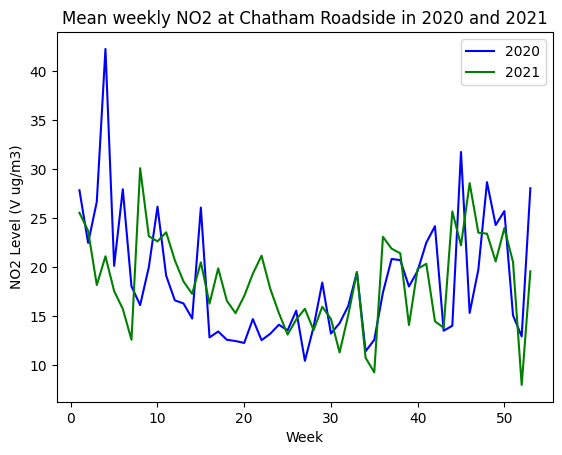

In [412]:
# Plots data from both years, to get an idea of trends over the year
x20_weeks = meanNO2_weeks20.keys()
x21_weeks = meanNO2_weeks21.keys()

fig, ax = plt.subplots()

ax.plot(x20_weeks, meanNO2_weeks20, color='blue', label='2020')
ax.plot(x21_weeks, meanNO2_weeks21, color = 'green', label='2021')

plt.title('Mean weekly NO2 at Chatham Roadside in 2020 and 2021')
plt.xlabel('Week')
plt.ylabel('NO2 Level (V ug/m3)')
ax.legend(loc='upper right')

plt.show

####Seasonal Differences
The plot shows a clear difference between measurements made during summer and winter. This could be due to weather or differences in traffic levels.

The first part of the two years are quite different, but the last approximatly a third of each year have peaks in very similar places. There is a bigger difference at about weeks 15 - 25. This is approximately when the first UK covid lockown was, and could be looked at more closely.

### Weekly Plots

In [413]:
# groups the data by Weekday and shows summary statistics by day of the week
measuredNO2_df.groupby('Weekday')['NO2 Level (V ug/m3)'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,2452.0,19.019897,13.566948,0.58930,8.944637,15.91839,26.016740,113.06189
1,2434.0,19.862832,13.623132,-0.10519,9.677307,16.66992,27.045835,92.13063
2,2485.0,21.569402,13.843067,-0.77743,10.894910,18.47115,30.186290,84.55297
3,2483.0,19.822405,12.873919,-0.13101,10.190015,16.82392,26.306000,72.00084
4,2500.0,20.776520,13.236096,0.03299,10.690697,18.00050,28.146380,76.72297
5,2494.0,15.905960,10.595521,0.75690,8.021902,13.60438,20.842495,74.93681
6,2464.0,13.160879,8.851133,-0.41740,6.782293,11.11951,16.998405,58.31275


In [414]:
# Finds mean nitrogen dioxide level by day of the week
meanNO2_days = measuredNO2_df.groupby('Weekday')['NO2 Level (V ug/m3)'].mean()
meanNO2_days

Weekday
0    19.019897
1    19.862832
2    21.569402
3    19.822405
4    20.776520
5    15.905960
6    13.160879
Name: NO2 Level (V ug/m3), dtype: float64

In [415]:
# Finds maximum nitrogen dioxide level by day of the week
maxNO2_days = measuredNO2_df.groupby('Weekday')['NO2 Level (V ug/m3)'].max()
maxNO2_days

Weekday
0    113.06189
1     92.13063
2     84.55297
3     72.00084
4     76.72297
5     74.93681
6     58.31275
Name: NO2 Level (V ug/m3), dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

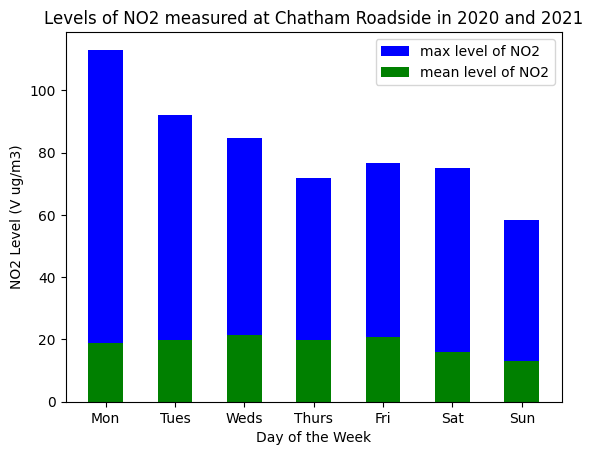

In [420]:
# additional: plots mean and max on a bar chart, to see if there might be a pattern over the week

marks = maxNO2_days.keys()
labels = ['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun']
#labels
#plt.bar(labels, maxNO2_days) #plt.bar(x axis, y axis)
#plt.show()

width = 0.5
fig, ax = plt.subplots()

ax.bar(marks, maxNO2_days, width, color='blue', label='max level of NO2')
ax.bar(marks, meanNO2_days, width, color = 'green', label='mean level of NO2')


ax.set(xticks = marks, xticklabels = labels)

plt.title('Levels of NO2 measured at Chatham Roadside in 2020 and 2021')
plt.xlabel('Day of the Week')
plt.ylabel('NO2 Level (V ug/m3)')
ax.legend(loc='upper right')

plt.show

#### Weekday Trends

As might be expected Sunday has the lowest nitogen dioxide levels. Monday is notably higher, with levels roughly decreasing through the week.

## Other possible investigations
#### Without additional information:
*   trends over a day: school run, rush hour (would need to convert the times too)
**   measurements are during covid on/off lockdowns, so work routines are interupted

#### Would require additional data or to look up dates:
*   excluding special weeks (such as holidays) to improve accuracy trends over a week
*   effect school holidays, other holidays/events
*   effect of lockdown dates
*   if there was weather data/ station from the same position, could relate to sunny days vs rainy/bad weather or if wind speed was relevant

*   check data quality of results